# EI2001: Ciencia de Datos en Astronomía

**Profesores:** Pía Cortés, Daniela Barrientos, Matías Suazo, Matías Mattamala

## Minitarea 2: Uso de NumPy y matplotlib

**Objetivos:**

1. Poner en práctica el uso de librerías en python (específicamente NumPy y matplotlib)
2. Familiarizarse con el concepto de ndarray
3. Realizar gráficos personalizados


**Instrucciones:**

1. Lean cuidadosamente todo lo que viene ahora
2. Para hacer esta tarea deben que hacer un **fork** del repositorio en sus cuentas de GitHub.
4. Abrir [Google Colab](https://colab.research.google.com) y seleccionar "abrir un archivo desde GitHub". Deben seleccionar su cuenta Github y escoger el repositorio que corresponde al fork que hicieron.
5. Si todo sale bien, debería abrirse una copia de este notebook en su cuenta de Google Colab.
6. Se adjuntan 6 mini actividades a completar. **TODAS** son necesarias y deben completar lo que se va pidiendo.
7. Cada vez que completen un ítem, deben guardar un avance en su fork de GitHub, de modo de **respaldar cada avance significativo**. Usen comentarios coherentes con cada respaldo "Sección 1 completa", "Tarea terminada", no solamente el que pone por defecto.



## 1. Cargar datos

Para esta minitarea trabajaremos con la fotometría de algunas estrellas. El objetivo final de esta actividad es obtener un gráfico llamado **Diagrama de Color-Magnitud (CMD)**, este es una variante del [Diagrama de Hertzsprung Russell](https://en.wikipedia.org/wiki/Hertzsprung%E2%80%93Russell_diagram) (o diagrama HR) cuyo objetivo es ver la distribución en Brillo y Color (Luminosidad y Temperatura para el diagrama HR) de las estrellas de una población. Con este se puede reconocer las distintas etapas evolutivas en las que se encuentran las estrellas, sus edades y metalicidades. 


Comienza por cargar los datos de una población sintética. En el repositorio se encuentra el archivo de texto llamado **`phot.dat`** que contiene:

1. Fotometría en las bandas B, V, R, I (magnitud aparente)
2. Temperatura ($log_{10}(T_{eff} / K)$)
3. Masa [$M_{\odot}$]
4. Distancia [kpc] 


* Carga los datos a formato `ndarray` en la variable `datos` e inspecciona su forma y tamaño, como tambien las diferentes columnas.

In [1]:
import numpy as np

# Carga los datos a un ndarray

archivo = 'https://raw.githubusercontent.com/astrodatos/minitarea2/master/phot.dat'
datos = np.array(np.loadtxt(archivo))

# Inspecciona su forma y tamaño

forma = np.shape(datos)
tamano = np.size(datos)
print("La forma es: " + str(forma)+ ", El tamano es: " + str(tamano))
bB = datos[:,0]
bV = datos[:,1]
bR = datos[:,2]
bI = datos[:,3]
T = datos[:,4]
M = datos[:,5]
D = datos[:,6]


La forma es: (5298, 7), El tamano es: 37086


## 2. Histogramas

El siguiente paso es inspeccionar los elementos en las diferentes columnas. Para ello crearás histogramas de algunas variables de interés. 

* Haz una figura con dos gráficos, uno al lado del otro, que contengan:

    1. Un histograma con las distribuciones de las magnitudes en las bandas B y V
    2. Un histograma con la distribución de masas

No olvides poner nombres a los ejes, titulos, leyendas, etc. Se creativo en el estilo de tu gráfico!

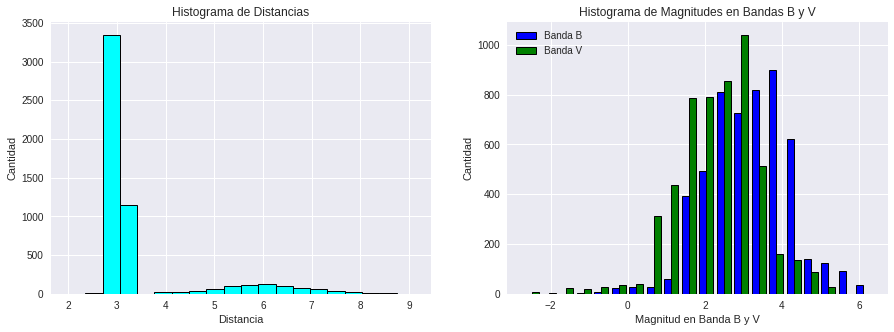

In [2]:
#Plotear histogramas de cada columna

import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize = (15,5), ncols = 2)
ax[0].hist(D, bins = 20, edgecolor = 'black',  linewidth=1, color = "cyan" )
ax[0].set_xlabel('Distancia')
ax[0].set_ylabel('Cantidad')
ax[0].set_title('Histograma de Distancias')

ax[1].hist([bB,bV],bins= 20, edgecolor = 'black', linewidth = 1, color = ['blue','green'], label = ["Banda B", "Banda V"])
ax[1].set_xlabel('Magnitud en Banda B y V')
ax[1].set_ylabel('Cantidad')
ax[1].set_title('Histograma de Magnitudes en Bandas B y V')
ax[1].legend(loc = 'upper left')




## 3. Filtrar datos

Como te habrás dado cuenta hay dos distribuciones de distancia. La mayoría de las estrellas corresponden a la población sintética creada, mientras que el resto son estrellas de fondo. Para estudiar nuestro cúmulo, primero debemos filtrar las estrellas que no pertenecen a él. 

* Haz una copia del set de datos originales en la variable `datos_filtrados` y sólo utiliza las estrellas que cumplan con un criterio basado en el histograma anterior.
* Imprime en pantalla el tamaño original del set de datos y del nuevo filtrado con el siguiente formato: _"El set original contenía X estrellas, luego de filtrar quedaron X"_


In [6]:
#Filtrar por distancia
dat = datos.copy()
datos_filtrados = dat[D<3.5]



print('El set original contenia ' + str(np.size(bB)) +  ' estrellas, luego de filtrar quedaron ' + str(np.size(datos_filtrados[:,0])))

El set original contenia 5298 estrellas, luego de filtrar quedaron 4506


## 4. Función Magnitud Absoluta

Para hacer el CMD necesitamos la magnitud absoluta de nuestras estrellas. Para esto crearemos una función que la calcule.

* Crea la función **`mag_abs(mag_ap, dist)`** de la siguiente forma:
    * **Input:** 
        1. `mag_ap`: ndarray de magnitudes aparentes
        2. `dist`: ndarray de distancias en unidades de [parsec]
    * **Output:**
        1. `mag_abs`: ndarray de magnitudes absolutas calculadas como: $M = m - 5 \log_{10} (d_{pc}) + 5 $

In [0]:
#Funcion mag_abs(mag, dist)
from math import *

def mag_abs(mag_ap, dist):
  magL = []
  for i in range(np.size(mag_ap)):
    M = mag_ap[i] - (5*log10(dist[i])) + 5
    magL.append(M)
    
    
  return np.array(magL)

## 5. CMD

Ahora podemos graficar nuestro Diagrama Color Magnitud. 

* Crea los siguientes arreglos:
    1. `MV`: magnitud absoluta en la banda V
    2. `color`: resta entre las magnitudes B y V (B-V)
* Grafica MV vs color como se muestra en la siguiente [figura](https://www.astro.rug.nl/~ahelmi/galaxies_course/class_II/47tuc.gif). (**Hint: pon atención a los ejes)

4506


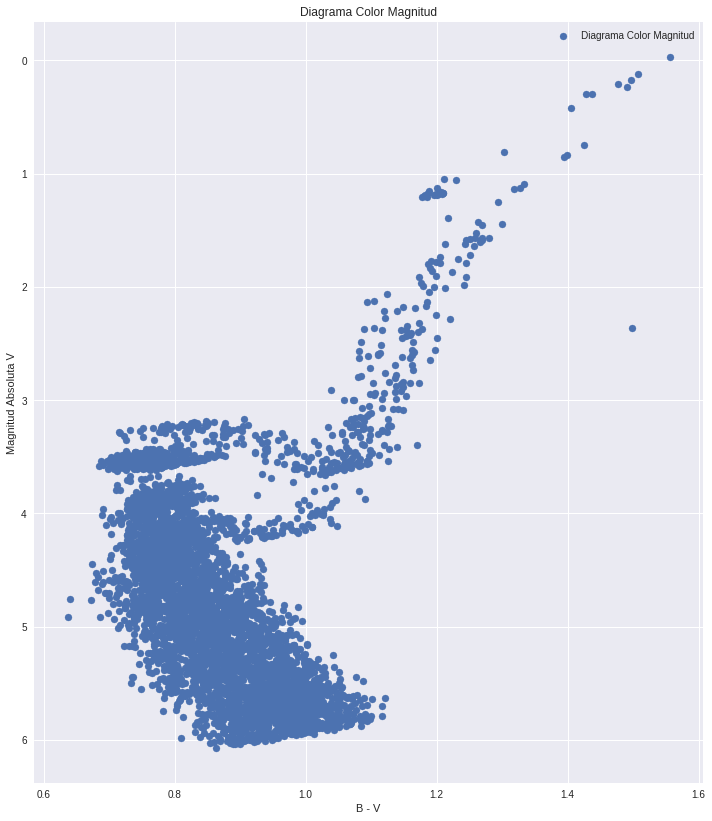

In [17]:
#Crear arrays MV y color
print(np.size(datos_filtrados[:,1]))
MV = mag_abs(datos_filtrados[:,1],datos_filtrados[:,6])
colorL = []
for i in range(np.size(datos_filtrados[:,1])):
  bv = datos_filtrados[i,0] - datos_filtrados[i,1]
  colorL.append(bv)
color = np.array(colorL)
#plot cmd
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (12,14))

cmd = ax.scatter(color, MV, label = 'Diagrama Color Magnitud')
ax.invert_yaxis()
ax.set_ylabel('Magnitud Absoluta V')
ax.set_xlabel('B - V')
ax.set_title('Diagrama Color Magnitud')
ax.legend()

## 6. Densidades y otros

Ahora crearemos gráficos con un poco más de información en color. 
* Haz una figura con dos gráficos, uno al lado del otro:
    1. `MV vs color`, poninedo las masas de cada estrella en color (recuerda la barra de colores)
    2. `MV vs color`, poniendo la Temperatura de cada estrella en color
* Haz una figura con un gráfico que contenga:
    1. [Histograma en 2D](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist2d.html) con ejes `MV vs color` (esta figura muestra la densidad de estrellas en el espacio `MV vs color`)
    
No olvides poner **SIEMPRE** ejes a tus figuras, titulos, leyendas, etc. Elige mapas de colores donde se noten las características de los gráficos.

Text(0,0.5,'Temperatura')

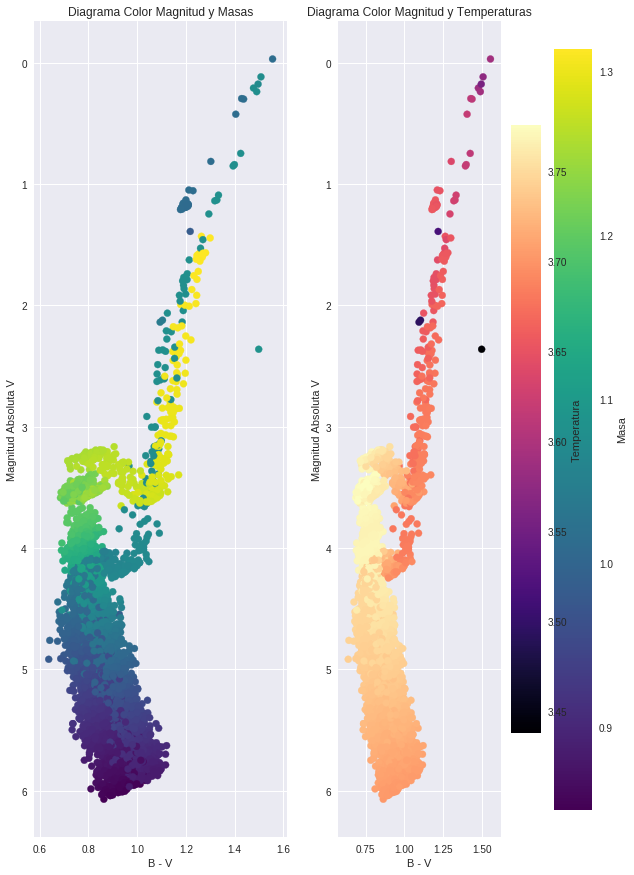

In [47]:
# plot cmd + masa / smd + temp
Mss = datos_filtrados[:,5]
T = datos_filtrados[:,4]

fig, ax1 = plt.subplots(figsize = (10,15), ncols = 2)

cmdmass = ax1[0].scatter(color, MV, c = Mss, cmap = 'viridis')
c1 = fig.colorbar(cmdmass)
ax1[0].invert_yaxis()
ax1[0].set_ylabel('Magnitud Absoluta V')
ax1[0].set_xlabel('B - V')
ax1[0].set_title('Diagrama Color Magnitud y Masas')
ax1[0].legend()
c1.ax.set_ylabel('Masa', rotation=90)

cmdt = ax1[1].scatter(color, MV, c = T, cmap = 'magma')
c2 = fig.colorbar(cmdt)
ax1[1].invert_yaxis()
ax1[1].set_ylabel('Magnitud Absoluta V')
ax1[1].set_xlabel('B - V')
ax1[1].set_title('Diagrama Color Magnitud y Temperaturas')
ax1[1].legend()
c2.ax.set_ylabel('Temperatura', rotation=90)

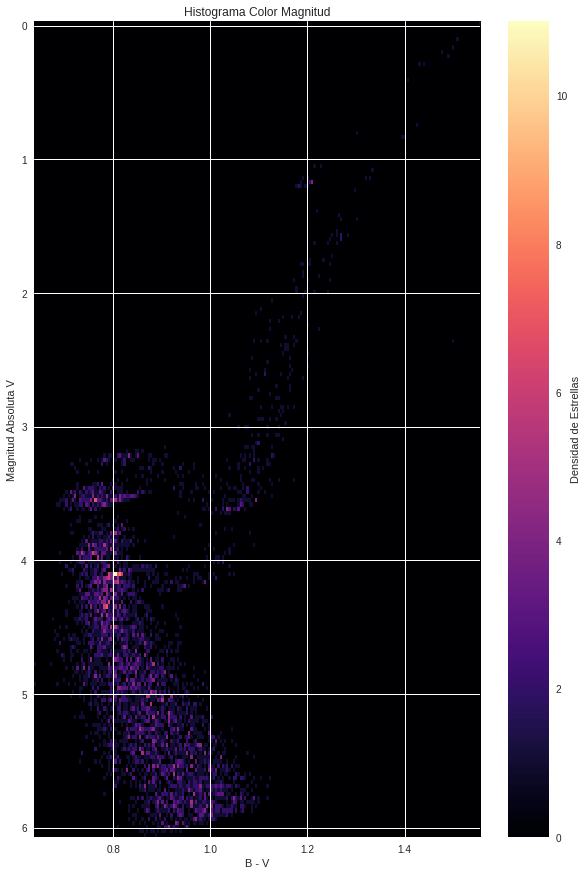

In [54]:
# plot cmd hist2D

fig, ax2 = plt.subplots(figsize = (10,15))

cmdh = ax2.hist2d(color, MV, bins = 200, cmap = 'magma')
cb = plt.colorbar(cmdh[3],ax = ax2)
ax2.invert_yaxis()
ax2.set_ylabel('Magnitud Absoluta V')
ax2.set_xlabel('B - V')
ax2.set_title('Histograma Color Magnitud')
cb.ax.set_ylabel('Densidad de Estrellas', rotation=90)
plt.show()
